In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df['education']=df['education'].fillna(df['education'].mean().round())
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean().round())
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean().round())
df['totChol']=df['totChol'].fillna(df['totChol'].mean().round())
df['BMI']=df['BMI'].fillna(df['BMI'].mean().round())
df['glucose']=df['glucose'].fillna(df['glucose'].mean().round())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean().round())


In [ ]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017265,0.197026,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070111,-0.035879,0.058199,0.081631,-0.116911,0.005679,0.088374
age,-0.029014,1.000000,-0.164016,-0.213662,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260709,0.394053,0.205586,0.135630,-0.012835,0.116941,0.225408
education,0.017265,-0.164016,1.000000,0.018270,0.008152,-0.010445,-0.035178,-0.080780,-0.038204,-0.022978,-0.128139,-0.061326,-0.135767,-0.053677,-0.033814,-0.053570
currentSmoker,0.197026,-0.213662,0.018270,1.000000,0.767051,-0.048348,-0.032980,-0.103710,-0.044285,-0.046191,-0.130281,-0.107933,-0.167537,0.062681,-0.054052,0.019448
cigsPerDay,0.316023,-0.192534,0.008152,0.767051,1.000000,-0.045683,-0.032710,-0.066444,-0.037085,-0.026165,-0.088523,-0.056474,-0.092948,0.075258,-0.056018,0.057647
BPMeds,-0.051544,0.121011,-0.010445,-0.048348,-0.045683,1.000000,0.114614,0.258580,0.051407,0.078789,0.251479,0.192254,0.099710,0.015136,0.048873,0.086448
prevalentStroke,-0.004550,0.057679,-0.035178,-0.032980,-0.032710,0.114614,1.000000,0.074791,0.006955,0.000099,0.057000,0.045153,0.025141,-0.017674,0.018059,0.061823
prevalentHyp,0.005853,0.306799,-0.080780,-0.103710,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162681,0.696656,0.615840,0.300625,0.146780,0.082750,0.177458
diabetes,0.015693,0.101314,-0.038204,-0.044285,-0.037085,0.051407,0.006955,0.077752,1.000000,0.040158,0.111265,0.050260,0.086391,0.048986,0.605694,0.097344
totChol,-0.070111,0.260709,-0.022978,-0.046191,-0.026165,0.078789,0.000099,0.162681,0.040158,1.000000,0.207445,0.163424,0.114965,0.090693,0.044706,0.081813


In [ ]:
scaler = MinMaxScaler()
df[['age','education','cigsPerDay','totChol','BMI','heartRate','glucose', 'diaBP', 'sysBP']] = scaler.fit_transform(df[['age','education','cigsPerDay','totChol','BMI','heartRate','glucose',  'diaBP', 'sysBP']])
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,1.000000,0,0.000000,0.0,0,0,0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,0.333333,0,0.000000,0.0,0,0,0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,0.000000,1,0.285714,0.0,0,0,0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,0.666667,1,0.428571,0.0,0,1,0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,0.666667,1,0.328571,0.0,0,0,0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,0.421053,0.333333,1,0.285714,0.0,0,0,0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0
4236,0,0.315789,0.000000,1,0.214286,0.0,0,0,0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118644,0
4237,0,0.526316,0.333333,0,0.000000,0.0,0,0,0,0.275042,0.236407,0.370370,0.143723,0.363636,0.189266,0
4238,1,0.210526,0.666667,0,0.000000,0.0,0,1,0,0.132428,0.271868,0.529101,0.243820,0.232323,0.090395,0


In [ ]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#lr= LogisticRegression(max_iter=1500)
#lr.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [ ]:
#y_pred=lr.predict(X_test)
#score= accuracy_score(y_test,y_pred)
#score

0.8596698113207547

In [ ]:
#from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
#avg="micro"
#acc=accuracy_score(y_test,y_pred)
#f1=f1_score(y_true=y_test,y_pred=y_pred, average=avg)
#recall=recall_score(y_true=y_test,y_pred=y_pred, average=avg)
#precision=precision_score(y_true=y_test,y_pred=y_pred, average=avg)
#print("ACC:",acc)
#print("F1:",f1)
#print("Recall:",recall)
#print("Precision:",precision)

ACC: 0.8596698113207547
F1: 0.8596698113207547
Recall: 0.8596698113207547
Precision: 0.8596698113207547


In [ ]:
#print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.67      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848



In [ ]:
#cm= confusion_matrix(y_test, y_pred)
#cm

array([[721,   4],
       [115,   8]])

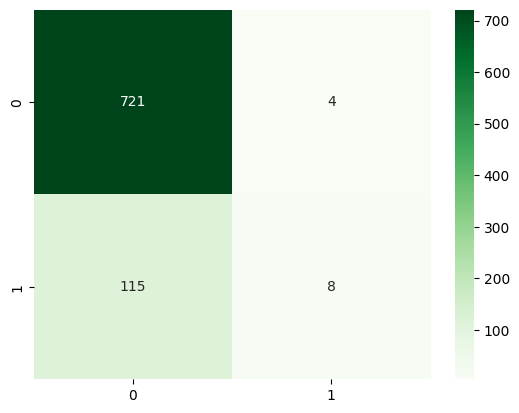

In [ ]:
#sns.heatmap(cm, cmap='Greens', annot=True, fmt='d')
#plt.show()

In [ ]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [ ]:
for col in df.columns[:-1]:
  df[col] = scaler.fit_transform(df[[col]])

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153113,-1.234283,2.006069,-0.988276,-0.758059,-0.173569,-0.077014,-0.671241,-0.162437,-0.940905,-1.196267,-1.083027,0.287037,0.342773,-0.217573,0
1,-0.867217,-0.417664,0.019908,-0.988276,-0.758059,-0.173569,-0.077014,-0.671241,-0.162437,0.300005,-0.515399,-0.159355,0.719445,1.590432,-0.261377,0
2,1.153113,-0.184345,-0.973172,1.011863,0.925413,-0.173569,-0.077014,-0.671241,-0.162437,0.187195,-0.220356,-0.243325,-0.113432,-0.073114,-0.524200,0
3,-0.867217,1.332233,1.012988,1.011863,1.767149,-0.173569,-0.077014,1.489778,-0.162437,-0.264045,0.800946,1.016227,0.682592,-0.904887,0.921327,1
4,-0.867217,-0.417664,1.012988,1.011863,1.177934,-0.173569,-0.077014,-0.671241,-0.162437,1.089676,-0.106878,0.092555,-0.663770,0.758659,0.132858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.019908,1.011863,0.925413,-0.173569,-0.077014,-0.671241,-0.162437,0.254881,-0.061487,-0.915087,-0.934025,0.675482,0.176662,0
4236,-0.867217,-0.650984,-0.973172,1.011863,0.504545,-0.173569,-0.077014,-0.671241,-0.162437,-0.602475,-0.265747,0.344466,-1.631774,0.841837,0.001446,0
4237,-0.867217,0.282295,0.019908,-0.988276,-0.758059,-0.173569,-0.077014,-0.671241,-0.162437,0.728684,0.051991,0.008585,-1.064238,0.342773,1.096542,0
4238,1.153113,-1.117623,1.012988,-0.988276,-0.758059,-0.173569,-0.077014,1.489778,-0.162437,-1.166525,0.392425,1.268138,-0.049553,-0.738532,-0.436592,0


In [ ]:
df["TenYearCHD"] = [1 if i else 0 for i in df["TenYearCHD"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train)

((3392, 15), (848, 15), (3392,), (848,), pandas.core.frame.DataFrame)

# NN

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(728, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy",  metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               4096      
                                                                 
 dense_31 (Dense)            (None, 728)               187096    
                                                                 
 dense_32 (Dense)            (None, 256)               186624    
                                                                 
 dense_33 (Dense)            (None, 1)                 257       
                                                                 
Total params: 378073 (1.44 MB)
Trainable params: 378073 (1.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
14/14 [==============================] - 0s 21ms/step - loss: 0.3375 - accuracy: 0.8620
Epoch 2/10
14/14 [==============================] - 0s 23ms/step - loss: 0.3364 - accuracy: 0.8665
Epoch 3/10
14/14 [==============================] - 0s 22ms/step - loss: 0.3238 - accuracy: 0.8709
Epoch 4/10
14/14 [==============================] - 0s 22ms/step - loss: 0.3237 - accuracy: 0.8644
Epoch 5/10
14/14 [==============================] - 0s 23ms/step - loss: 0.3095 - accuracy: 0.8750
Epoch 6/10
14/14 [==============================] - 0s 21ms/step - loss: 0.2966 - accuracy: 0.8794
Epoch 7/10
14/14 [==============================] - 0s 22ms/step - loss: 0.2924 - accuracy: 0.8806
Epoch 8/10
14/14 [==============================] - 0s 21ms/step - loss: 0.2733 - accuracy: 0.8833
Epoch 9/10
14/14 [==============================] - 0s 20ms/step - loss: 0.2637 - accuracy: 0.8939
Epoch 10/10
14/14 [==============================] - 0s 25ms/step - loss: 0.2535 - accuracy: 0.8953


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 6ms/step - loss: 0.5013 - accuracy: 0.8278


In [ ]:
from tensorflow.keras.utils import plot_model

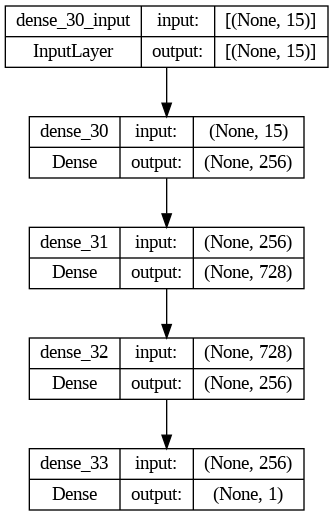

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Epoch 1/3
11/11 [==============================] - 1s 111ms/step - loss: 0.2464 - accuracy: 0.8997 - val_loss: 0.2123 - val_accuracy: 0.9131
Epoch 2/3
11/11 [==============================] - 1s 80ms/step - loss: 0.2269 - accuracy: 0.9090 - val_loss: 0.2264 - val_accuracy: 0.9087
Epoch 3/3
11/11 [==============================] - 1s 91ms/step - loss: 0.2110 - accuracy: 0.9204 - val_loss: 0.2499 - val_accuracy: 0.8807


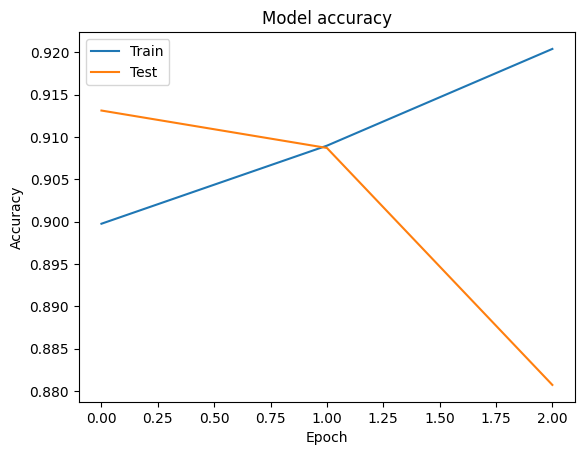

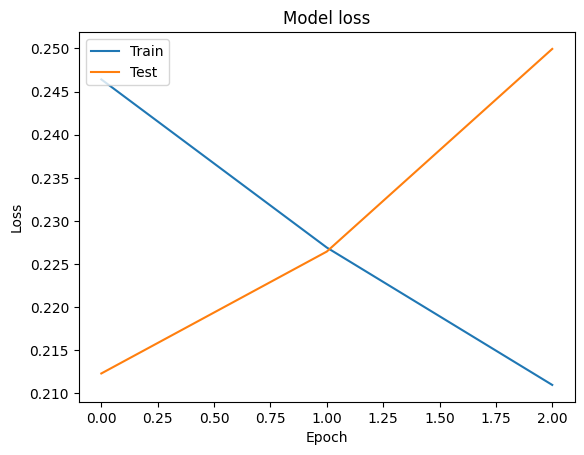

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and capture the history
history = model.fit(X_train, y_train, epochs=3, batch_size=256, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


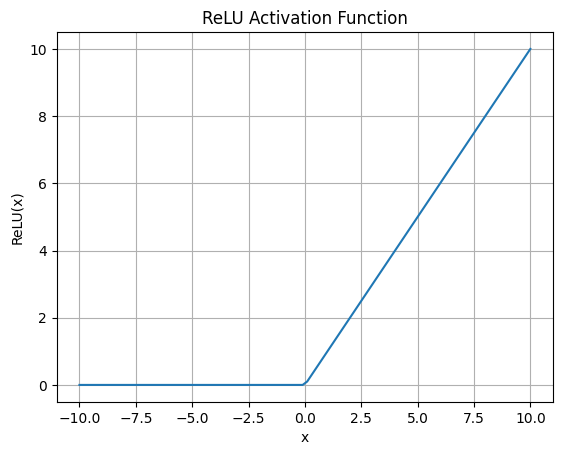

In [ ]:
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

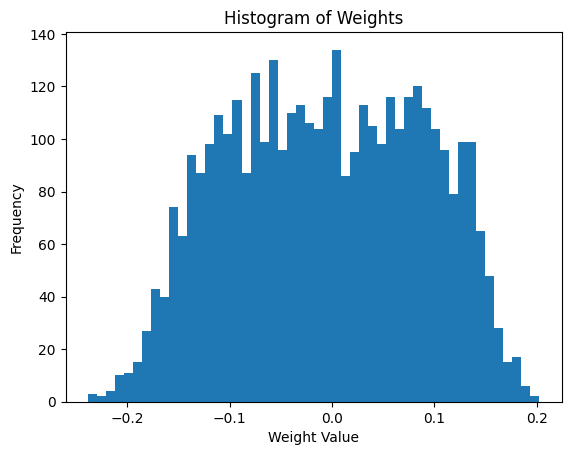

In [ ]:
# Get weights of the first layer
weights, biases = model.layers[0].get_weights()

# Plot weights
plt.hist(weights.flatten(), bins=50)
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7535377358490566

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
random_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8525943396226415